# SHApproximation Fuction 

This example illustrates the input and output of the Bluemira spherical harmonics approximation fuction (SHApproximation) which can be used in coilset current and position optimisation for spherical tokamaks. For an example of how SHApproximation is used, please see the notebook called 'Use of Spherical Harmonic Approximation in Optimisation.ipynb'.

In [1]:
# from bluemira.equilibria.equilibrium import Equilibrium
import matplotlib.pyplot as plt
import numpy as np
from bluemira.display.auto_config import plot_defaults
from bluemira.equilibria.harmonics import SHApproximation
from bluemira.equilibria.equilibrium import Equilibrium
from bluemira.equilibria.plotting import EquilibriumPlotter, PLOT_DEFAULTS

plot_defaults()

%pdb

Automatic pdb calling has been turned ON


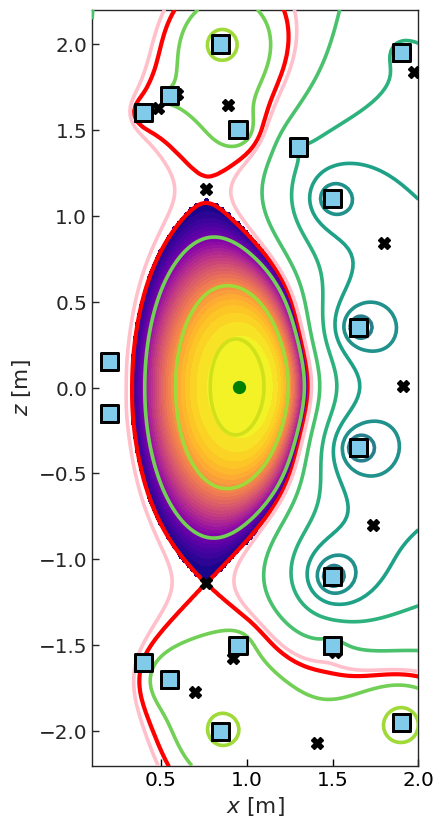

In [5]:
# Data from EQDSK file
file_path = "SH_test_file.json"

# Plot
eq = Equilibrium.from_eqdsk(file_path)
f, ax = plt.subplots()
eq.plot(ax=ax)
eq.coilset.plot(ax=ax)
plt.show()

### Inputs

#### Required

- eq = Our chosen Bluemira Equilibrium 

#### Optional

- n_points: Number of desired collocation points
- point_type: How the collocation points are distributed
- acceptable_fit_metric: how 'good' we require the approximation to be
- r_t: typical lengthscale for spherical harmonic approximation
- extra_info: set this to true if you wish to return additional information and plot the results.

+-------------------------------------------------------------------------+
| One or more of your coils is too close to the LCFS to be used in the    |
| SH approximation. Coil names: ['PF_1' 'PF_10'].                         |
+-------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
| The fit metric value acheived is 0.019473247879694688 using 4           |
| degrees.                                                                |
+-------------------------------------------------------------------------+


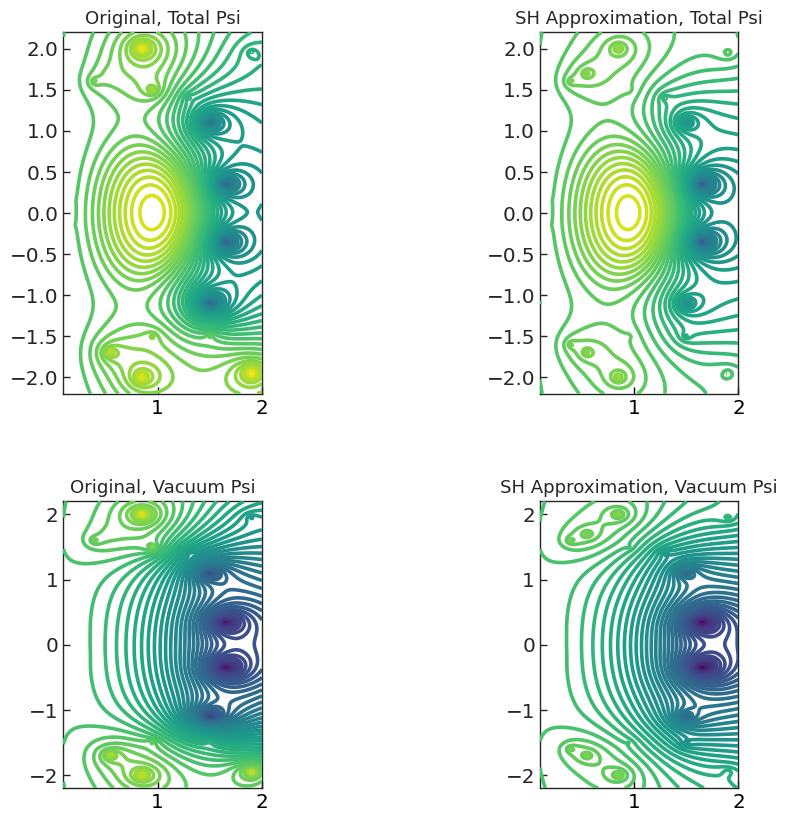

In [3]:
# Information needed for SH Approximation
shapprox = SHApproximation(
    eq,
    n_points=50,
    point_type="random_plus_extrema",
    acceptable_fit_metric=0.03,
    extra_info=True,
)

### Outputs

SHApproximation outputs a dictionary of results that can be used in optimisation. 

#### Always output

- "coilset", coilset to use with SH approximation 
- "r_t", typical lengthscale for spherical harmonic approximation 
- "harmonic_amplitudes", SH coefficients/amplitudes for required number of degrees 
- "max_degree", number of degrees required for a SH approx with the desired fit metric 

In [11]:
print(shapprox["coilset"])

CoilSet(
        Coil(PF_1 ctype=PF x=0.2 z=0.15 dx=0.05 dz=0.05 current=7.6e+03 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_2 ctype=PF x=0.4 z=1.6 dx=0.05 dz=0.05 current=7.9e+04 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_3 ctype=PF x=0.55 z=1.7 dx=0.05 dz=0.05 current=6.9e+04 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_4 ctype=PF x=0.85 z=2 dx=0.05 dz=0.05 current=6.3e+04 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_5 ctype=PF x=0.95 z=1.5 dx=0.05 dz=0.05 current=1.2e+04 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_6 ctype=PF x=1.3 z=1.4 dx=0.05 dz=0.05 current=-2.3e+04 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_7 ctype=PF x=1.5 z=1.1 dx=0.05 dz=0.05 current=-6.8e+04 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_8 ctype=PF x=1.6 z=0.35 dx=0.05 dz=0.05 current=-1.4e+05 j_max=nan b_max=nan discretisation=nan)
        Coil(PF_9 ctype=PF x=1.9 z=1.9 dx=0.05 dz=0.05 current=1.4e+04 j_max=nan b_max=nan discre

In [10]:
print(shapprox["r_t"])

1.365340019626778


In [9]:
print(shapprox["harmonic_amplitudes"])

[ 1.04191713e-08  1.15753501e-01 -5.74949015e-04 -3.84981597e-02]


In [8]:
print(shapprox["max_degree"])

4


#### Ouput on request

- "fit_metric_value", fit metric acheived
- "approx_total_psi", the total psi obtained using the SH approximation

In [14]:
print(shapprox["fit_metric_value"])

0.019473247879694688


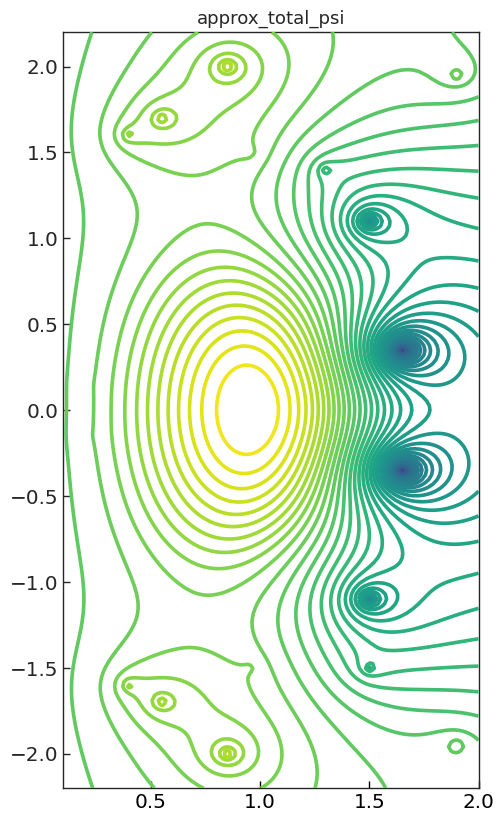

In [19]:
psi = shapprox["approx_total_psi"]
levels = np.linspace(np.amin(psi), np.amax(psi), 50)
plot = plt.subplot2grid((2, 2), (0, 0), rowspan=2, colspan=1)
plot.set_title("approx_total_psi")
plot.contour(eq.grid.x, eq.grid.z, psi, levels=levels, cmap="viridis", zorder=8)
plt.show()